<a href="https://colab.research.google.com/github/Himanshu-Raghav1/Heart_Disease_Prediction/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df=pd.read_csv("heart (1).csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.duplicated().sum()

np.int64(0)

<Axes: >

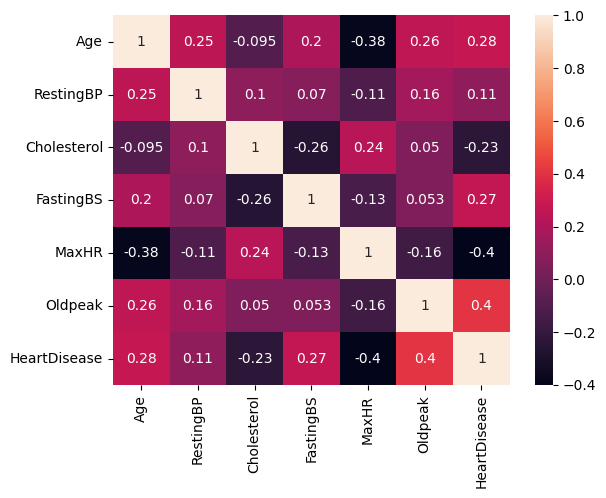

In [9]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [10]:
df_encoded=pd.get_dummies(df,drop_first=True)
print(df_encoded.head())
df_encoded.info()

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False

In [11]:
x=df_encoded.drop("HeartDisease",axis=1)
y=df_encoded["HeartDisease"]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [14]:
models={
    "logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}
result=[]

In [15]:
for name,model in models.items():
   model.fit(x_train_scaled, y_train)
   y_pred=model.predict(x_test_scaled)
   acc=accuracy_score(y_test,y_pred)
   f1=f1_score(y_test,y_pred)
   result.append({
       "model":name,
       "Accuracy":round(acc,4),
       "F1 Score":round(f1,4)
   })

In [16]:
result

[{'model': 'logistic Regression', 'Accuracy': 0.8533, 'F1 Score': 0.8696},
 {'model': 'KNN', 'Accuracy': 0.8533, 'F1 Score': 0.8696},
 {'model': 'NaiveBayes', 'Accuracy': 0.8587, 'F1 Score': 0.8738},
 {'model': 'Decision Tree', 'Accuracy': 0.8533, 'F1 Score': 0.8732},
 {'model': 'SVM', 'Accuracy': 0.875, 'F1 Score': 0.891}]

In [17]:
import joblib
joblib.dump(models["KNN"],"KNN_heart.pkl")
joblib.dump(scaler,"scaler.pkl")
joblib.dump(x.columns.tolist(),"columns.pkl")


['columns.pkl']